In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [68]:
data = pd.read_csv(r'C:\Ran\Berkeley\IEOR\290\Project\Data\New Data\newData1.csv')

# 1. Data preprocessing

In [69]:
data = data[data['Industry'] == 'Tech']

In [70]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
data = data[data['Industry'] != 'Transportation'] # Too few observations

In [71]:
data['Birth Year'] = data[data['Birth Year'] != 'None']['Birth Year']
data['Birth Year'].unique()

array([2001, 1987, 1957, 1990, 1981, 1968, 1980, 1986, 1971, 1967, 1963,
       1964, 1959, 1974, 1973, 1969, 1991, 1966, 1947, 1975, 1976, 1979,
       1978, 1984, 1985, 1983, 1988, 1955, 1993, 1937, 1989, 1961, 1977,
       1944, 1965, 1997, 1962, 1982, 1972, 1958, 1996, 1992, 1995, 1948,
       1970, 1935, 1960, 1953, 1956, 1942, 1940, 1952, 1936, 1943, 1932,
       1994, 1951, 1950, 1945, 1954, 1946, 1949, 1921, 1941, 1930, 1998,
       1933], dtype=int64)

In [72]:
data = data[~data['Birth Year'].isnull()] #Drops nan
data['Age'] = 2018 - data['Birth Year'].astype('int')

In [73]:
data['Gender Flag'] = data['Gender Flag'].replace({0: 'unknown', 1: 'female', 2: 'male'})
data['Education'] = data['Education'].replace({0: 'unknown', 1: 'High School', 2: 'Vocational degree', 3: 'Associates', 
                                               4: 'Bachelors', 5:'Masters', 6: 'MBA', 7: 'PhD'})
data['Length'] = data['Length']*1/30
# Categorize length in 1:'0-6 months', 2:'6-12 months', 3:'12-18 months', 4:'18-24 months', 5:'more than 2 years'
data['Length']=pd.cut(data['Length'], bins=[0, 6, 12, 18,24,1000000], 
                                             include_lowest=True, 
                                             labels=['<6mo','6-12mo','12-18mo','12-24mo','>24mo'])

# Convert Birthyear to Age in 1:'> 45 yrs old', 2:'36-45 yrs old', 3:'26-35 yrs old', 4:'< 26 yrs old'
data['Age']=pd.cut(data['Age'], bins=[0, 25, 35, 45, 100000], 
                                             include_lowest=True, 
                                             labels=['>45 yrs old','36-45 yrs old','26-35 yrs old','<26 yrs old'])

#data['Length'] = data['Length'].astype('int')

In [74]:
data.head()

,ID,Birth Year,Gender Flag,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,City of profile,Country of profile,Education,...,Length,Role,Dept,Location,Industry,Layoff Date,Company Name,Employees Affected,laid_off,Age
6,d5dc4adf-7444-38c2-84d7-10dcaa5cba78,2001,male,Web Design,0.868526,Digital Marketing,0.085376,San Francisco,United States,unknown,...,>24mo,"UX Design Lead,design,lead","MARKETING,TECHNOLOGY",NaN,Tech,4/3/2017,Google,104,0,>45 yrs old
7,d5dc4adf-7444-38c2-84d7-10dcaa5cba78,2001,male,Web Design,0.868526,Digital Marketing,0.085376,San Francisco,United States,unknown,...,>24mo,"UX Design Lead,design,lead","MARKETING,TECHNOLOGY",NaN,Tech,3/13/2017,Google,94,0,>45 yrs old
27,a8dff133-203b-3de0-9131-55ea2dd302df,1987,unknown,Data Analysis,0.384446,Web Development,0.336130,Mountain View,United States,Masters,...,12-18mo,Strategic Partner Manager Google Marketing Sol...,"MARKETING,OVERSIGHT,BUSINESS","mountain view, california",Tech,4/3/2017,Google,104,0,36-45 yrs old
28,a8dff133-203b-3de0-9131-55ea2dd302df,1987,unknown,Data Analysis,0.384446,Web Development,0.336130,Mountain View,United States,Masters,...,12-18mo,Strategic Partner Manager Google Marketing Sol...,"MARKETING,OVERSIGHT,BUSINESS","mountain view, california",Tech,3/13/2017,Google,94,0,36-45 yrs old
29,cedab10e-ff29-3055-9519-2ed9cfcc1868,1957,male,Sales,0.349658,Digital Marketing,0.280364,San Francisco,United States,Bachelors,...,12-24mo,"Sales & Marketing Application Training,sales &...","HR,MARKETING",NaN,Tech,10/31/2017,"Oracle America, Inc.",964,0,<26 yrs old


In [75]:
threshold = 5  # Remove items less than or equal to threshold
for col in data[data.columns.difference(['Age', 'Length'])]: #Cannot apply this to categorized features
    vc = data[col].value_counts()
    vals_to_remove = vc[vc <= threshold].index.values
    data[col].loc[data[col].isin(vals_to_remove)] = 0
    

# 2. Overview of Lay off in bay area

### Different features' layoff ratio

<Figure size 432x288 with 0 Axes>

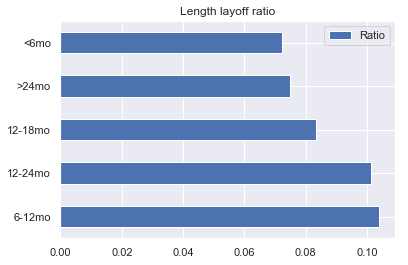

<Figure size 432x288 with 0 Axes>

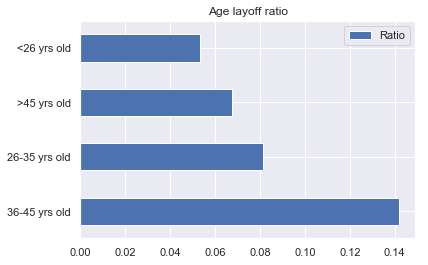

<Figure size 432x288 with 0 Axes>

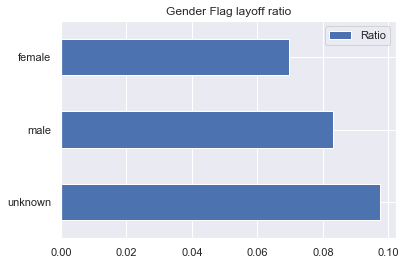

<Figure size 432x288 with 0 Axes>

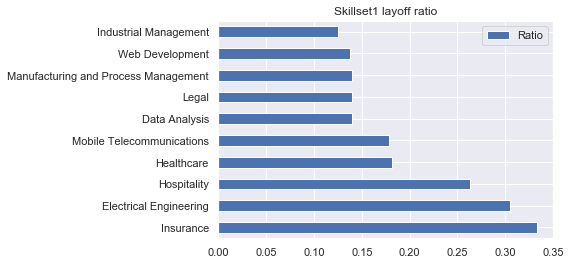

<Figure size 432x288 with 0 Axes>

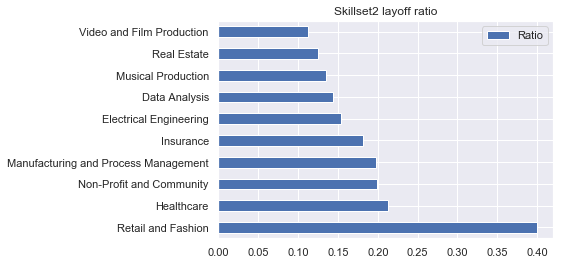

<Figure size 432x288 with 0 Axes>

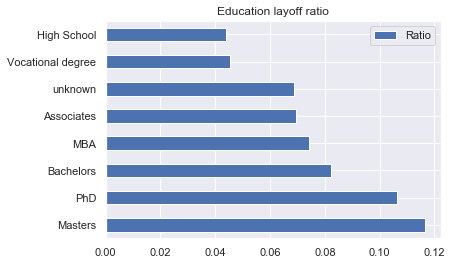

<Figure size 432x288 with 0 Axes>

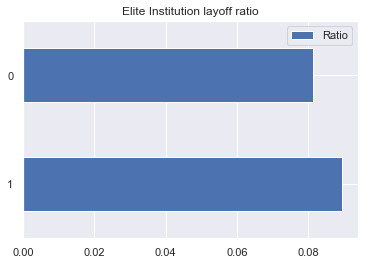

<Figure size 432x288 with 0 Axes>

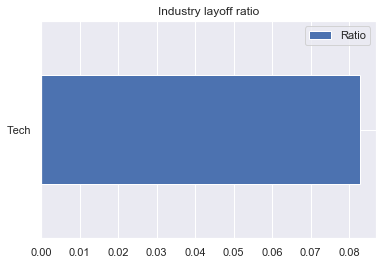

In [76]:
sns.set()
laid_off = data[data['laid_off'] == 1]

features = ['Length', 'Age', 'Gender Flag', 'Skillset1', 'Skillset2', 'Education', 'Elite Institution', 'Industry']

for feature in features:  
    laid_off_ratio = laid_off[feature].value_counts()/data[feature].value_counts()
    laid_off_ratio = pd.DataFrame(laid_off_ratio).rename(columns={feature: "Ratio"}).sort_values(by = 'Ratio', ascending = False)[:10]
    plt.figure()
    laid_off_ratio.plot.barh()
    plt.title(feature + ' layoff ratio')

### key findings:
#### - No significant observed correlation between length and ratio
#### - 36-45 yrs old most vulnerable， followed by 26-35 yrs old
#### - No obvious difference in gender 
#### - Elite has slightly higher ratio
#### - Employees equipped with skillsets like Insurance, Retail & Fashion
#### - Masters and PhDs are the most vulnerable to lay off events

## 3. Time Series Analysis

### 3.1 Number of layoff events

D:\Anaconda\envs\data-x\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\envs\data-x\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\data-x\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

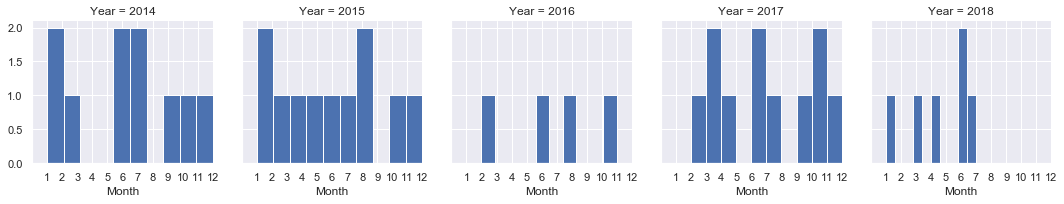

In [77]:
df = data.drop_duplicates('Layoff Date')
df['Layoff Date'] = pd.to_datetime(df['Layoff Date'],errors='coerce')
df['Year'] = df['Layoff Date'].dt.year.astype('int64')
df['Month'] = df['Layoff Date'].dt.month.astype('int64')
df['Day'] = df['Layoff Date'].dt.day.astype('int64')
df['Layoff Date'] = pd.to_datetime(df['Layoff Date']).astype('datetime64')
g = sns.FacetGrid(df, col = 'Year')
g.map(plt.hist,'Month').set(xlim=(0,12),xticks=[1,2,3,4,5,6,7,8,9,10,11,12])

### key findings:
#### - Layoff events were more common in 2015, 2016 and 2017: 10 months in a year occurred layoff events
#### - Layoff events are more likely to happen in the early months and late months of a year

### Layoff events scale

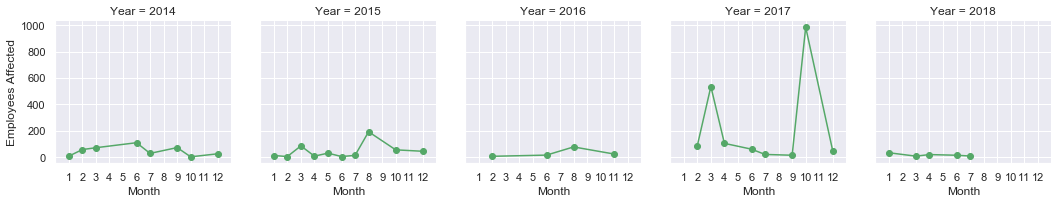

In [78]:
grouped = df.groupby(['Year','Month'])
laid_off_scale = grouped['Employees Affected'].sum()
laid_off_scale = laid_off_scale.reset_index() 
g = sns.FacetGrid(laid_off_scale, col = 'Year')
g.map(plt.plot,'Month','Employees Affected',color = 'g',marker ='o').set(xlim=(0,13),xticks=[1,2,3,4,5,6,7,8,9,10,11,12])

### key findings:
#### - 2016 occurred mass layoffs most frequently

In [79]:
# split date
data['Layoff Date'] = pd.to_datetime(data['Layoff Date']).dt.to_period('M')
laid_off['Layoff Date'] = pd.to_datetime(laid_off['Layoff Date']).dt.to_period('M')

unique_months = data['Layoff Date'].sort_values().unique()
unique_months = unique_months[1:] #Remove 1970-01
unique_months

D:\Anaconda\envs\data-x\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<PeriodArray>
['2014-02', '2014-03', '2014-06', '2014-07', '2014-09', '2014-10', '2014-12',
 '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07',
 '2015-08', '2015-10', '2015-12', '2016-02', '2016-06', '2016-08', '2016-11',
 '2017-02', '2017-03', '2017-04', '2017-06', '2017-07', '2017-09', '2017-10',
 '2017-12', '2018-01', '2018-03', '2018-04', '2018-06', '2018-07']
Length: 34, dtype: period[M]

### Skillset1

In [80]:
ratio_s1 = []#skillset1

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Skillset1'].value_counts()/\
    data[data['Layoff Date'] == month]['Skillset1'].value_counts()
    ratio = ratio.dropna()
    
    ratio_s1.append(ratio)

In [81]:
ratio_s1# list of series by month

[Administration                     0.041667
 Data Analysis                      0.166667
 Digital Marketing                  0.061224
 Human Resources                    0.166667
 IT Management and Support          0.052632
 Industrial Management              0.250000
 Musical Production                 0.500000
 Operations Management              0.200000
 Product Management                 0.042553
 Sales                              0.067669
 Social Media and Communications    0.066667
 Software Engineering               0.080292
 Web Design                         0.088889
 Web Development                    0.080000
 Name: Skillset1, dtype: float64, Administration                     0.043478
 Digital Marketing                  0.115385
 Finance                            0.100000
 Human Resources                    0.166667
 Industrial Management              0.250000
 Legal                              0.125000
 Musical Production                 0.500000
 Operations Management

In [82]:
s1 = data['Skillset1'].value_counts()[0:9].index
ts_ratio_s1 = {}
for skill in s1:
    ts_ratio_s1[skill] = []
    
for month in range(len(ratio_s1)):
    for skill in s1:        
        if skill in ratio_s1[month].index:
            ts_ratio_s1[skill].append(ratio_s1[month][ratio_s1[month].index == skill].item())
        else:
            ts_ratio_s1[skill].append(0)

In [83]:
ts_ratio_s1

{'Sales': [0.06766917293233082,
  0.03125,
  0.08609271523178808,
  0.07476635514018691,
  0.10714285714285714,
  0.02142857142857143,
  0.014492753623188406,
  0.06666666666666667,
  0.059602649006622516,
  0.059602649006622516,
  0.053691275167785234,
  0.06,
  0.03424657534246575,
  0.034482758620689655,
  0.07575757575757576,
  0.08771929824561403,
  0.08974358974358974,
  0.053691275167785234,
  0.0273972602739726,
  0.06962025316455696,
  0.0196078431372549,
  0.013245033112582781,
  0.0552423900789177,
  0.15168539325842698,
  0.06289308176100629,
  0.03225806451612903,
  0.013157894736842105,
  0.02433371958285052,
  0.02564102564102564,
  0.006493506493506494,
  0,
  0,
  0.006493506493506494,
  0],
 'Software Engineering': [0.08029197080291971,
  0.0948905109489051,
  0.14035087719298245,
  0.234375,
  0.1935483870967742,
  0.07766990291262135,
  0.07547169811320754,
  0.06666666666666667,
  0.08571428571428572,
  0.08571428571428572,
  0.1111111111111111,
  0.126126126126126

In [84]:
ts_ratio_s1 = pd.DataFrame.from_dict(ts_ratio_s1)
ts_ratio_s1['time'] = unique_months

In [85]:
ts_ratio_s1 = ts_ratio_s1.melt('time', var_name = 'Skillset1', value_name = 'ratio')
ts_ratio_s1.head()

,time,Skillset1,ratio
0,2014-02,Sales,0.067669
1,2014-03,Sales,0.031250
2,2014-06,Sales,0.086093
3,2014-07,Sales,0.074766
4,2014-09,Sales,0.107143


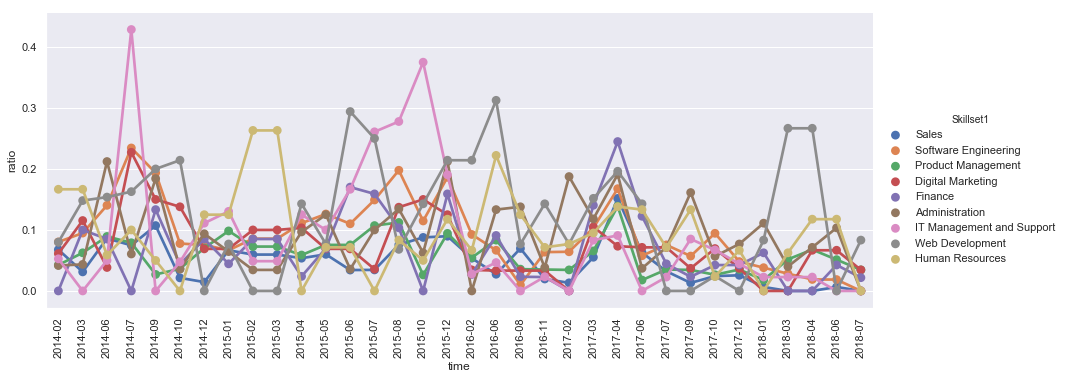

In [86]:
g = sns.catplot(x = 'time', y = 'ratio', hue = 'Skillset1', data = ts_ratio_s1, kind = 'point', aspect = 2.5)
g.set_xticklabels(rotation=90)

### Skillset2

In [87]:
ratio_s2 = []#skillset2

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Skillset2'].value_counts()/\
    data[data['Layoff Date'] == month]['Skillset2'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_s2.append(ratio)

In [88]:
s2 = data['Skillset2'].value_counts()[0:9].index
ts_ratio_s2 = {}
for skill in s2:
    ts_ratio_s2[skill] = []
    
for month in range(len(ratio_s2)):
    for skill in s2:        
        if skill in ratio_s2[month].index:
            ts_ratio_s2[skill].append(ratio_s2[month][ratio_s2[month].index == skill].item())
        else:
            ts_ratio_s2[skill].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


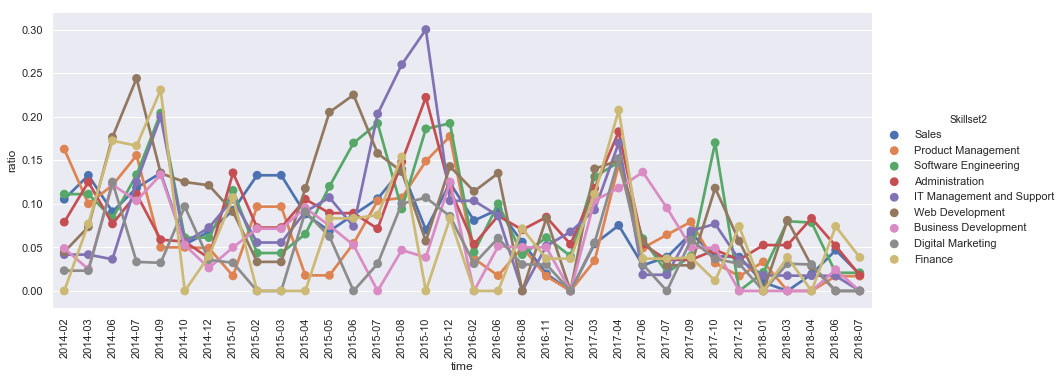

In [89]:
ts_ratio_s2 = pd.DataFrame.from_dict(ts_ratio_s2)
ts_ratio_s2['time'] = unique_months

ts_ratio_s2 = ts_ratio_s2.melt('time', var_name = 'Skillset2', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'Skillset2', data = ts_ratio_s2, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - due to the imbalance of sample size (the number of employees with sepecific skillset is very small like public policy while some skillset is much bigger), some skillsets get 100% laid off ratio

### Length of Employment

In [90]:
ratio_length = []#Length of Employment

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Length'].value_counts()/\
    data[data['Layoff Date'] == month]['Length'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_length.append(ratio)

In [91]:
lengths = data['Length'].unique()
ts_ratio_length = {}

for length in lengths:
    ts_ratio_length[length] = []
    
for month in range(len(ratio_length)):
    for length in lengths:        
        if length in ratio_length[month].index:
            ts_ratio_length[length].append(ratio_length[month][ratio_length[month].index == length].item())
        else:
            ts_ratio_length[length].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


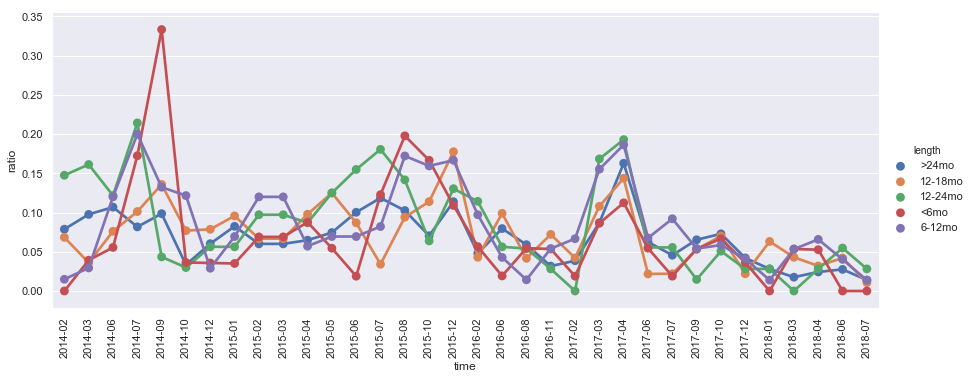

In [92]:
ts_ratio_length = pd.DataFrame.from_dict(ts_ratio_length)
ts_ratio_length['time'] = unique_months

ts_ratio_length = ts_ratio_length.melt('time', var_name = 'length', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'length', data = ts_ratio_length, aspect = 2.5)
g.set_xticklabels(rotation=90)

### Gender

In [93]:
ratio_gender = []#Length of Employment

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Gender Flag'].value_counts()/\
    data[data['Layoff Date'] == month]['Gender Flag'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_gender.append(ratio)

In [94]:
genders = data['Gender Flag'].unique()
ts_ratio_gender = {}

for g in genders:
    ts_ratio_gender[g] = []
    
for month in range(len(ratio_gender)):
    for g in genders:        
        if g in ratio_gender[month].index:
            ts_ratio_gender[g].append(ratio_gender[month][ratio_gender[month].index == g].item())
        else:
            ts_ratio_gender[g].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


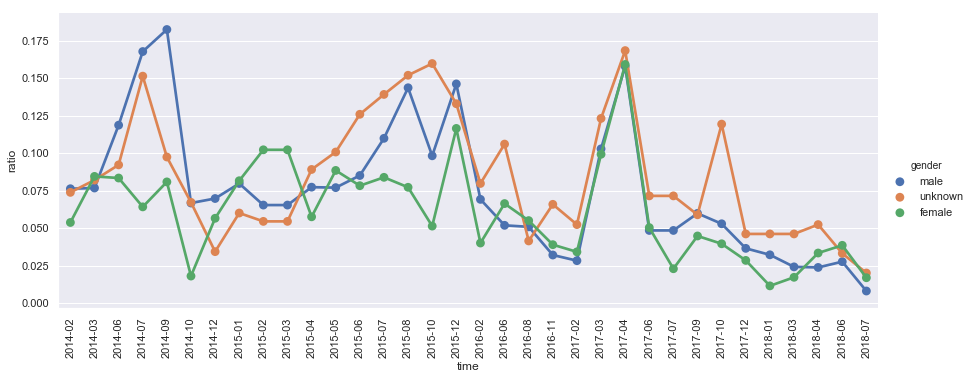

In [95]:
ts_ratio_gender = pd.DataFrame.from_dict(ts_ratio_gender)
ts_ratio_gender['time'] = unique_months

ts_ratio_gender = ts_ratio_gender.melt('time', var_name = 'gender', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'gender', data = ts_ratio_gender, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - In general, male employees had higher laidoff ratio than male

### Age

In [96]:
ratio_age = []

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Age'].value_counts()/\
    data[data['Layoff Date'] == month]['Age'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_age.append(ratio)

In [97]:
age = data['Age'].unique()
ts_ratio_age = {}

for a in age:
    ts_ratio_age[a] = []
    
for month in range(len(ratio_age)):
    for a in age:        
        if a in ratio_age[month].index:
            ts_ratio_age[a].append(ratio_age[month][ratio_age[month].index == a].item())
        else:
            ts_ratio_age[a].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


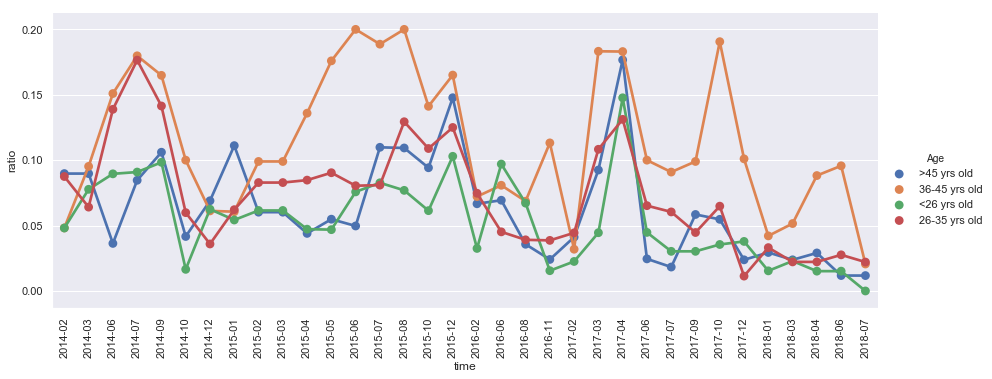

In [98]:
ts_ratio_age = pd.DataFrame.from_dict(ts_ratio_age)
ts_ratio_age['time'] = unique_months

ts_ratio_age = ts_ratio_age.melt('time', var_name = 'Age', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'Age', data = ts_ratio_age, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - In general, 36-45 years old employees are most vulnerable while those <26 years old are least vulnerable

### Elite instituion

In [99]:
ratio_elite = []

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Elite Institution'].value_counts()/\
    data[data['Layoff Date'] == month]['Elite Institution'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_elite.append(ratio)

In [100]:
elite = data['Elite Institution'].unique()
ts_ratio_elite = {}

for a in elite:
    ts_ratio_elite[a] = []
    
for month in range(len(ratio_elite)):
    for a in elite:        
        if a in ratio_elite[month].index:
            ts_ratio_elite[a].append(ratio_elite[month][ratio_elite[month].index == a].item())
        else:
            ts_ratio_elite[a].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


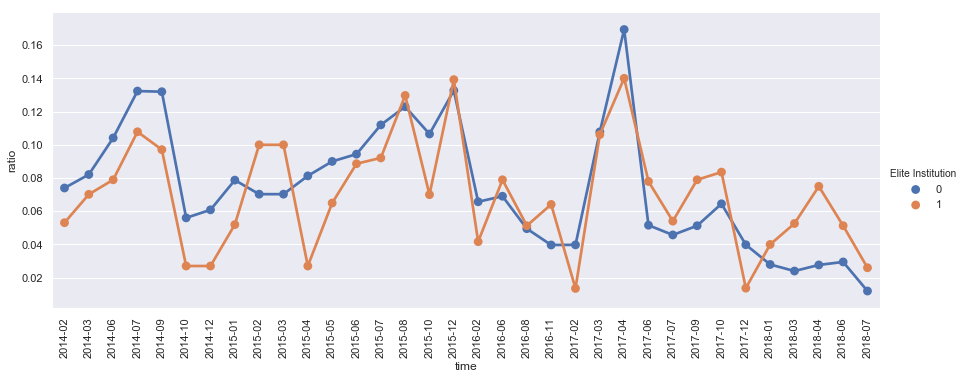

In [101]:
ts_ratio_elite = pd.DataFrame.from_dict(ts_ratio_elite)
ts_ratio_elite['time'] = unique_months

ts_ratio_elite = ts_ratio_elite.melt('time', var_name = 'Elite Institution', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'Elite Institution', data = ts_ratio_elite, aspect = 2.5)
g.set_xticklabels(rotation=90)

### key findings:
#### - No significant difference observable

### Education

In [102]:
ratio_edu = []

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Education'].value_counts()/\
    data[data['Layoff Date'] == month]['Education'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_edu.append(ratio)

In [103]:
edu = data['Education'].unique()
ts_ratio_edu = {}

for a in edu:
    ts_ratio_edu[a] = []
    
for month in range(len(ratio_edu)):
    for a in edu:        
        if a in ratio_edu[month].index:
            ts_ratio_edu[a].append(ratio_edu[month][ratio_edu[month].index == a].item())
        else:
            ts_ratio_edu[a].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


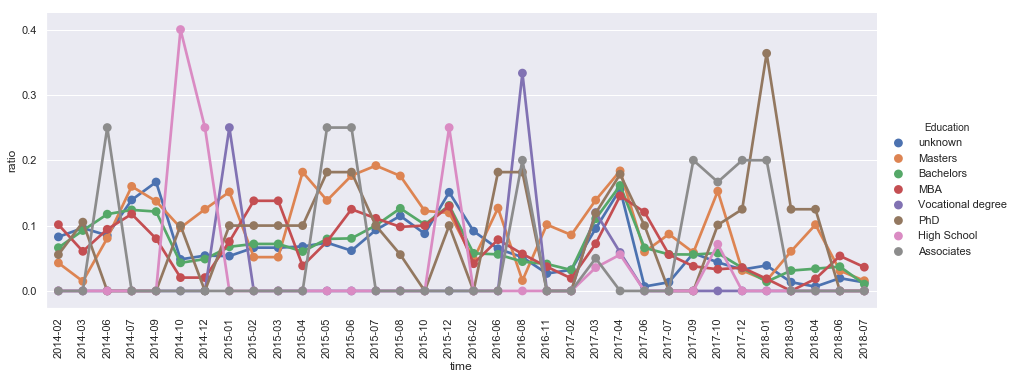

In [104]:
ts_ratio_edu= pd.DataFrame.from_dict(ts_ratio_edu)
ts_ratio_edu['time'] = unique_months

ts_ratio_edu = ts_ratio_edu.melt('time', var_name = 'Education', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'Education', data = ts_ratio_edu, aspect = 2.5)
g.set_xticklabels(rotation=90)

### Industry

In [105]:
ratio_indus = []

for month in unique_months:  
    ratio = laid_off[laid_off['Layoff Date'] == month]['Industry'].value_counts()/\
    data[data['Layoff Date'] == month]['Industry'].value_counts()
    ratio = ratio.fillna(0)
    
    ratio_indus.append(ratio)

In [106]:
indus = data['Industry'].unique()
ts_ratio_indus = {}

for a in indus:
    ts_ratio_indus[a] = []
    
for month in range(len(ratio_indus)):
    for a in indus:        
        if a in ratio_indus[month].index:
            ts_ratio_indus[a].append(ratio_indus[month][ratio_indus[month].index == a].item())
        else:
            ts_ratio_indus[a].append(0)

D:\Anaconda\envs\data-x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


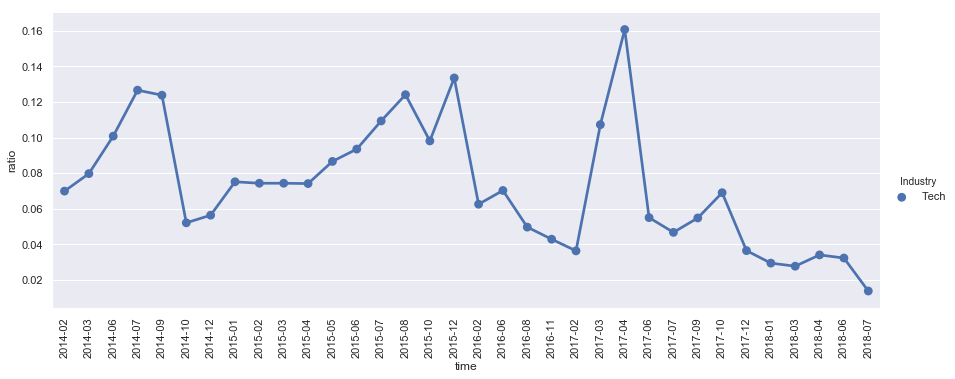

In [107]:
ts_ratio_indus= pd.DataFrame.from_dict(ts_ratio_indus)
ts_ratio_indus['time'] = unique_months

ts_ratio_indus = ts_ratio_indus.melt('time', var_name = 'Industry', value_name = 'ratio')

g = sns.factorplot(x = 'time', y = 'ratio', hue = 'Industry', data = ts_ratio_indus, aspect = 2.5)
g.set_xticklabels(rotation=90)